In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mnist fashion dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training sets

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
# model building time mfers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer 1
    keras.layers.Dense (128, activation='relu'), # hidden layer 2
    keras.layers.Dense(10, activation='softmax') # output layer 3
])

- sequential model: info going sequentially from left to right
- first layer is flattened, allows us to take in a 28x28 and flatten it into 784 pixels, we don't need to handle the transformation
- second layer is 128 nodes tall, is a dense layer, has activation function "relu", which is rectified linear unit
- third layer is 10 outputs (to match with the number of classes), is dense layer, has activation function softmax, which makes sure all values are between 0 and 1 and will all add up to 1

- next need to pick the optimizer we'll use, the loss function, and the metrics we'll use

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# not going into depth on each of these choices

In [7]:
#model.fit(train_images, train_labels, epochs=10)
# this prints out our accuracy on the training data, which isn't necessarily accurate

In [8]:
#test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
#print('Test accuracy: ', test_acc)

- model was doing really well on the training data, but less well on the test data
- so we seem to be overfitting

In [9]:
accuracies = []
for i in range(100):
    model.fit(train_images, train_labels, epochs=1)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    accuracies.append(test_acc)




313/313 [==============================] - 0s 610us/step - loss: 0.8059 - accuracy: 0.8870


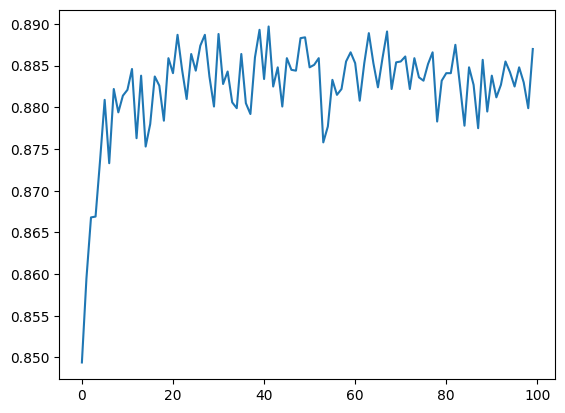

In [10]:
plt.plot(accuracies)

In [16]:
# making predictions
predictions = model.predict(test_images)
# needs to be in an array because model is better at predicting a bunch of things at once
predictions[0] # prediction for 1st image

313/313 [==============================] - 0s 577us/step


array([3.4490712e-32, 0.0000000e+00, 2.5972454e-25, 0.0000000e+00,
       2.3743107e-32, 8.0054197e-10, 4.5875016e-28, 1.3192924e-12,
       4.7913324e-27, 1.0000000e+00], dtype=float32)

In [23]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

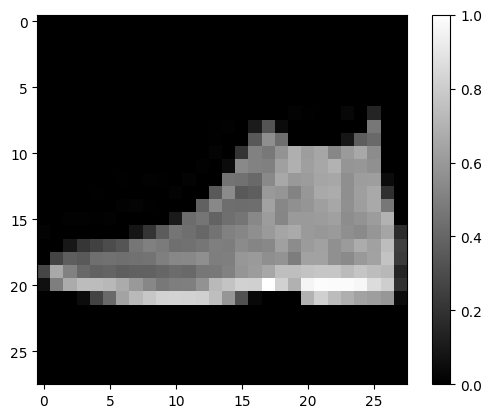

In [24]:
plt.figure()
plt.imshow(test_images[0])
plt.gray()
plt.colorbar()
plt.grid(False)
plt.show()

well that sure does look like an ankle boot